## Introduction
The purpose of this notebook is to compare government spending with household spending. This project has an extremely wide scope with a very general hypothesis. The hypothesis is that households are more responsible with their money than government. The reason I take this view with my hypothesis is twofold. First, households are able to respond to changing conditions and circumstances more quickly than government. Second, that politics makes it hard for politicians to raise taxes or cut spending, thus we see the budget move steadily upward.

# Data
Household data is available from the Fed: https://www.federalreserve.gov/releases/housedebt/default.htm
According to the Fed this data set consists of "Household debt service payments and financial obligations as a percentage of disposable personal income; seasonally adjusted"

Federal budget data is available from the CBO: https://www.cbo.gov/about/products/budget-economic-data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

In [2]:
%matplotlib inline

In [3]:
# Budget data in dollars
budget = pd.read_csv('Desktop/budgetdata.csv', thousands=',')

In [4]:
budget.head()

,Unnamed: 0,Revenues,Outlays,On-Budget,Social Security,Postal Service,Total,Public Debt
0,1965,116.8,118.2,-1.6,0.2,n.a.,-1.4,260.8
1,1966,130.8,134.5,-3.1,-0.6,n.a.,-3.7,263.7
2,1967,148.8,157.5,-12.6,4.0,n.a.,-8.6,266.6
3,1968,153.0,178.1,-27.7,2.6,n.a.,-25.2,289.5
4,1969,186.9,183.6,-0.5,3.7,n.a.,3.2,278.1


In [5]:
budget.columns

Index(['Unnamed: 0', 'Revenues', 'Outlays', 'On-Budget', 'Social Security',
       'Postal Service ', 'Total', 'Public Debt'],
      dtype='object')

In [6]:
budget.rename(columns={'Unnamed: 0':'Year'}, inplace=True)

In [7]:
budget.head()

,Year,Revenues,Outlays,On-Budget,Social Security,Postal Service,Total,Public Debt
0,1965,116.8,118.2,-1.6,0.2,n.a.,-1.4,260.8
1,1966,130.8,134.5,-3.1,-0.6,n.a.,-3.7,263.7
2,1967,148.8,157.5,-12.6,4.0,n.a.,-8.6,266.6
3,1968,153.0,178.1,-27.7,2.6,n.a.,-25.2,289.5
4,1969,186.9,183.6,-0.5,3.7,n.a.,3.2,278.1


In [8]:
budget.dtypes

Year                 int64
Revenues           float64
Outlays            float64
On-Budget          float64
Social Security    float64
Postal Service      object
Total              float64
Public Debt        float64
dtype: object

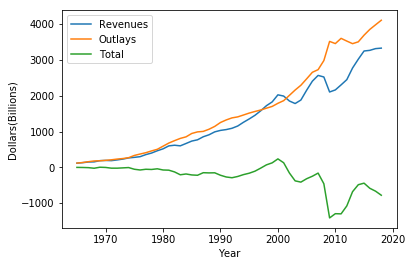

In [9]:
budget.plot(x='Year',y=['Revenues','Outlays','Total'])
plt.ylabel('Dollars(Billions)')
plt.show()

In [10]:
# Budget data as percentage of GDP. The budget data sets had huge headers that contained superfluous information.
# It was easier to just delete it all in Excel and then read the table off the first page and import column names separately.
budgdp = pd.read_csv('Desktop/budgetgdp.csv')

In [11]:
budgdp.head(3)

,Unnamed: 0,As a Percentage of Gross Domestic Product,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,1965,16.5,16.7,-0.2,0.0,n.a.,-0.2,36.8
1,1966,16.8,17.2,-0.4,-0.1,n.a.,-0.5,33.8
2,1967,17.8,18.8,-1.5,0.5,n.a.,-1.0,31.9


In [12]:
budgdp.columns = budget.columns

In [13]:
budgdp.head(3)

,Year,Revenues,Outlays,On-Budget,Social Security,Postal Service,Total,Public Debt
0,1965,16.5,16.7,-0.2,0.0,n.a.,-0.2,36.8
1,1966,16.8,17.2,-0.4,-0.1,n.a.,-0.5,33.8
2,1967,17.8,18.8,-1.5,0.5,n.a.,-1.0,31.9


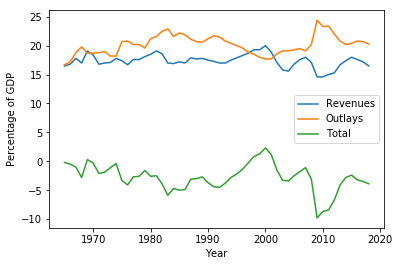

In [14]:
budgdp.plot(x='Year',y=['Revenues','Outlays','Total'])
plt.ylabel('Percentage of GDP')
plt.show()

In [15]:
# Household debt service payments and financial obligations as a percentage of disposable personal income; seasonally adjusted
hhold = pd.read_csv('Desktop/FRB_FOR.csv')

In [16]:
hhold.head(3)

,Series Description,"Debt service ratio, seasonally adjusted","Mortgage debt service ratio, seasonally adjusted","Consumer debt service ratio, seasonally adjusted","Financial obligations ratio, seasonally adjusted"
0,1994Q1,10.388445,5.556527,4.831917,15.690103
1,1994Q2,10.452491,5.528256,4.924236,15.761009
2,1994Q3,10.586958,5.551088,5.035871,15.914829


In [17]:
hhold['Series Description'] = hhold['Series Description'].astype('str')

In [18]:
hhold['Quarter'] = hhold['Series Description'].str[4:6]

In [19]:
hhold['Series Description'] = pd.DataFrame(hhold['Series Description'].str.split('Q',n=1,expand=True))

In [20]:
hhold.sample(3)

,Series Description,"Debt service ratio, seasonally adjusted","Mortgage debt service ratio, seasonally adjusted","Consumer debt service ratio, seasonally adjusted","Financial obligations ratio, seasonally adjusted",Quarter
42,2004,12.244783,5.929711,6.315073,16.897298,Q3
48,2006,12.608604,6.523358,6.085246,17.248805,Q1
96,2018,9.861202,4.250261,5.610941,15.331046,Q1


In [21]:
house = hhold[hhold['Quarter'] == 'Q1']

In [22]:
house.head()

,Series Description,"Debt service ratio, seasonally adjusted","Mortgage debt service ratio, seasonally adjusted","Consumer debt service ratio, seasonally adjusted","Financial obligations ratio, seasonally adjusted",Quarter
0,1994,10.388445,5.556527,4.831917,15.690103,Q1
4,1995,10.888513,5.640501,5.248012,16.198637,Q1
8,1996,11.242343,5.589139,5.653204,16.558361,Q1
12,1997,11.328849,5.603136,5.725713,16.631998,Q1
16,1998,11.144147,5.515538,5.628610,16.325270,Q1


In [23]:
house.columns = ['year', 'debt_ratio','mortgage','consumer','financial','quarter']

In [24]:
house['year'] = house['year'].astype('int64')

C:\Users\Brett\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
house.head()

,year,debt_ratio,mortgage,consumer,financial,quarter
0,1994,10.388445,5.556527,4.831917,15.690103,Q1
4,1995,10.888513,5.640501,5.248012,16.198637,Q1
8,1996,11.242343,5.589139,5.653204,16.558361,Q1
12,1997,11.328849,5.603136,5.725713,16.631998,Q1
16,1998,11.144147,5.515538,5.628610,16.325270,Q1


Definitions  
**Mortgage** = Mortgage debt / disposable income  
**Consumer** = consumption debt / disposable income  
**Debt ratio** = mortgage + consumer  
**Financial:** Broader scope of debt that includes rent payments, car leases, various sources of debt.

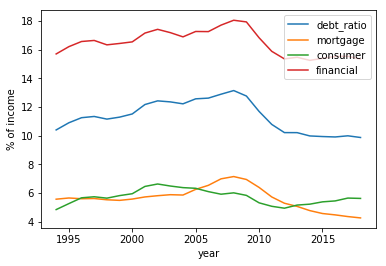

In [26]:
house.plot(x='year',y=['debt_ratio','mortgage','consumer','financial'])
plt.ylabel('% of income')
plt.show()

In [27]:
budgdp.set_index('Year', inplace=True)
house.set_index('year', inplace=True)

In [28]:
budgdp94 = budgdp.loc[1994:]

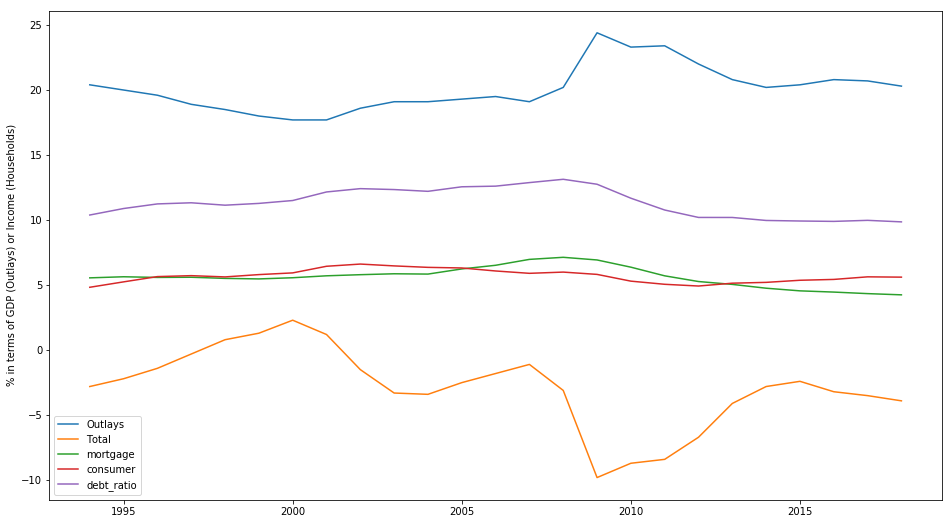

In [29]:
fig, ax = plt.subplots(figsize = (16,9))
ax.plot(budgdp94.Outlays)
ax.plot(budgdp94.Total)
ax.plot(house.mortgage)
ax.plot(house.consumer)
ax.plot(house.debt_ratio)
plt.ylabel('% in terms of GDP (Outlays) or Income (Households)')
ax.legend()
plt.show()

Questions
1. Do Federal politicians have a greater impact from year to year on Outlays or Revenues? My gut says year to year, Outlays would be a better measurement to this hypothesis. However, when politicians do make changes to Revenues (taxes), they can have an outsized effect.
2. How do we normalize for GDP? Another benefit to Outlays over Revenues is the actual metric is shielded somewhat from GDP growth/shrinkage. IE, given a constant tax rate the government Revenues could vary based on how the economy did overall for the year. But, assuming the government Outlays budget for any given year is constant, the percentage of GDP will fluctuate given how the economy did for that year as well.
3. The same is true about households and normalizing for income
4. Do we need to normalize for housing prices given how much disposable income is tied up in mortgages?
5. Is there anything we can learn from the relationship between consumption debt and mortgage debt?



## Is there a relationship between our debt ratio (as % of income) and GDP?

Do people take on more debt irrationally when things are good?
GDP data is taken from the World Bank.
https://data.worldbank.org/indicator/NY.GDP.MKTP.KD.ZG?locations=US

In [31]:
gdp = pd.read_csv('./Desktop/GDP.csv', skiprows=4)

In [32]:
gdp.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-3.685030,3.446055,-1.369863,4.198232,0.848228,-0.450586,-0.211225,1.330511,NaN,NaN
1,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,14.362441,0.426355,12.752287,5.600745,2.724543,1.451315,2.260314,2.665292,NaN,NaN
2,Angola,AGO,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,4.859220,3.471981,8.542147,4.954590,4.822626,0.943576,-2.580097,-0.147207,NaN,NaN


In [33]:
us_gdp = gdp[gdp['Country Code']=='USA']

In [48]:
us_gdp

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
249,United States,USA,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,2.3,6.1,4.4,5.8,6.4,...,2.721577,1.550836,2.249546,1.842081,2.451973,2.88091,1.567215,2.21701,NaN,NaN


In [71]:
us_gdp2 = us_gdp.drop(['Country Name','Country Code','Indicator Name', 'Indicator Code'],axis=1)

In [73]:
us_gdp2 = us_gdp2.transpose()

In [85]:
us_gdp2.index.names = ['year']
us_gdp2.columns = ['gdp_change']

In [87]:
us_gdp_94 = us_gdp2.loc['1994':'2017']

In [104]:
us_gdp_94.index = us_gdp_94.index.astype('int64',copy=False)

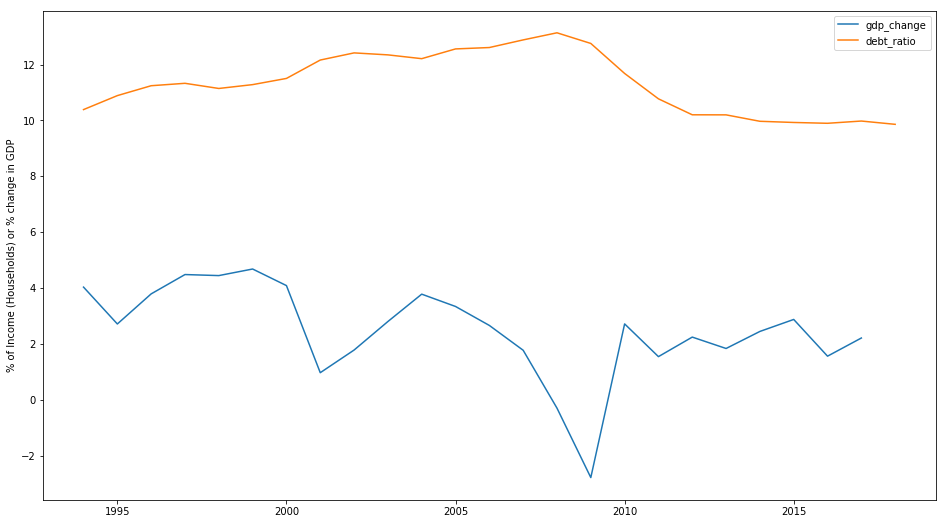

In [106]:
fig, ax = plt.subplots(figsize = (16,9))
ax.plot(us_gdp_94.gdp_change)
ax.plot(house.debt_ratio)
plt.ylabel('% of Income (Households) or % change in GDP')
ax.legend()
plt.show()

The data set is a little short overall to make any real conclusion. We know looking back that the recession was largely debt fueled, so what is really needed is much more data to see if we can find recurring patterns over time or if this is just specific to this particular downturn.